In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.ticker as mticker

In [2]:
a=pd.read_csv("D:\DOWNLOAD\salesdata (1).csv")

a["Order Date"]=pd.to_datetime(a["Order Date"],format="%d-%m-%Y")
a["Year"]=a["Order Date"].dt.year
a["Month"]=a["Order Date"].dt.month
a

,Order Date,Customer Name,State,Category,Sub-Category,Sales,Quantity,Profit,Year,Month
0,2014-01-03,Darren Powers,Texas,Office Supplies,Paper,16.45,2,5.55,2014,1
1,2014-01-04,Phillina Ober,Illinois,Office Supplies,Labels,11.78,3,4.27,2014,1
2,2014-01-04,Phillina Ober,Illinois,Office Supplies,Storage,272.74,3,-64.77,2014,1
3,2014-01-04,Phillina Ober,Illinois,Office Supplies,Binders,3.54,2,-5.49,2014,1
4,2014-01-05,Mick Brown,Pennsylvania,Office Supplies,Art,19.54,3,4.88,2014,1
...,...,...,...,...,...,...,...,...,...,...
9989,2017-12-30,Patrick O'Donnell,New York,Technology,Phones,90.93,7,2.73,2017,12
9990,2017-12-30,Patrick O'Donnell,New York,Office Supplies,Binders,52.78,3,19.79,2017,12
9991,2017-12-30,Erica Bern,California,Office Supplies,Binders,13.90,2,4.52,2017,12
9992,2017-12-30,Erica Bern,California,Office Supplies,Binders,20.72,2,6.48,2017,12


In [3]:
a.drop_duplicates(inplace=True)

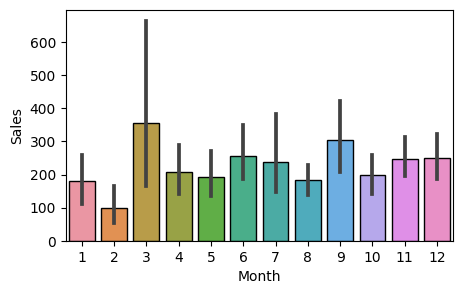

In [128]:
plt.figure(figsize=(5,3))
b=a[a["Year"]==2014]
sns.barplot(x="Month",y="Sales",data=b,edgecolor="black")
plt.show()

# Sales of different category

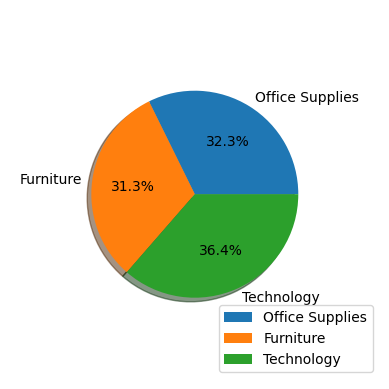

In [5]:
b=a.groupby("Category")["Sales"].sum()
c=a["Category"].unique()

plt.pie(b,labels=c,autopct="%0.1f%%",shadow=True,radius=0.7)
plt.legend(loc=4)
plt.show()

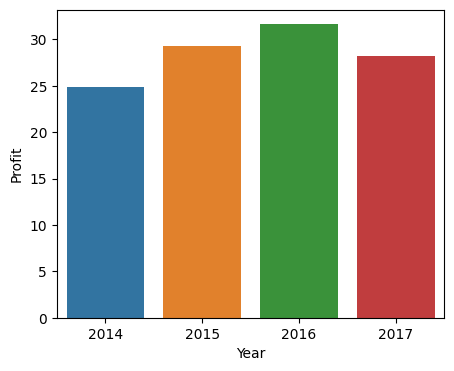

In [142]:
plt.figure(figsize=(5,4))
sns.barplot(x=a["Year"],y=a["Profit"],data=a,errorbar=('ci', 0))
plt.show()

In [ ]:
sns.barplot(x=a["Year"],y=a["Profit"],data=a,ci=0.5,alpha=0.5)
plt.show()


In [ ]:
sns.violinplot(x="Year",y="Profit",data=a)
plt.ylim(0,10000)

<Axes: xlabel='Month', ylabel='Profit'>

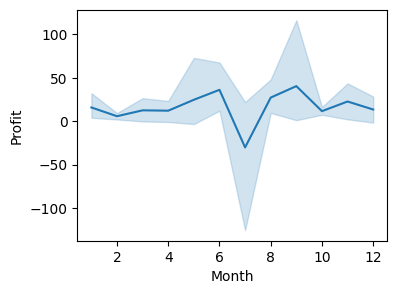

In [147]:
plt.figure(figsize=(4,3))
b=a[(a["Year"]==2014) & (a["Category"]=="Office Supplies")]["Profit"]
c=a[(a["Year"]==2014) & (a["Category"]=="Office Supplies")]["Month"]
sns.lineplot(x=c,y=b,data=a)

# Top 5 Customers

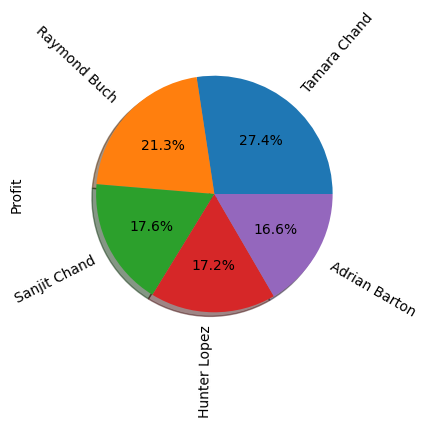

In [43]:
a.groupby("Customer Name")["Profit"].sum()\
.sort_values(ascending=False).head(5).\
plot(kind="pie",autopct="%0.1f%%",shadow=True,rotatelabels=True,radius=0.8)
 
plt.show()

<Figure size 500x400 with 0 Axes>

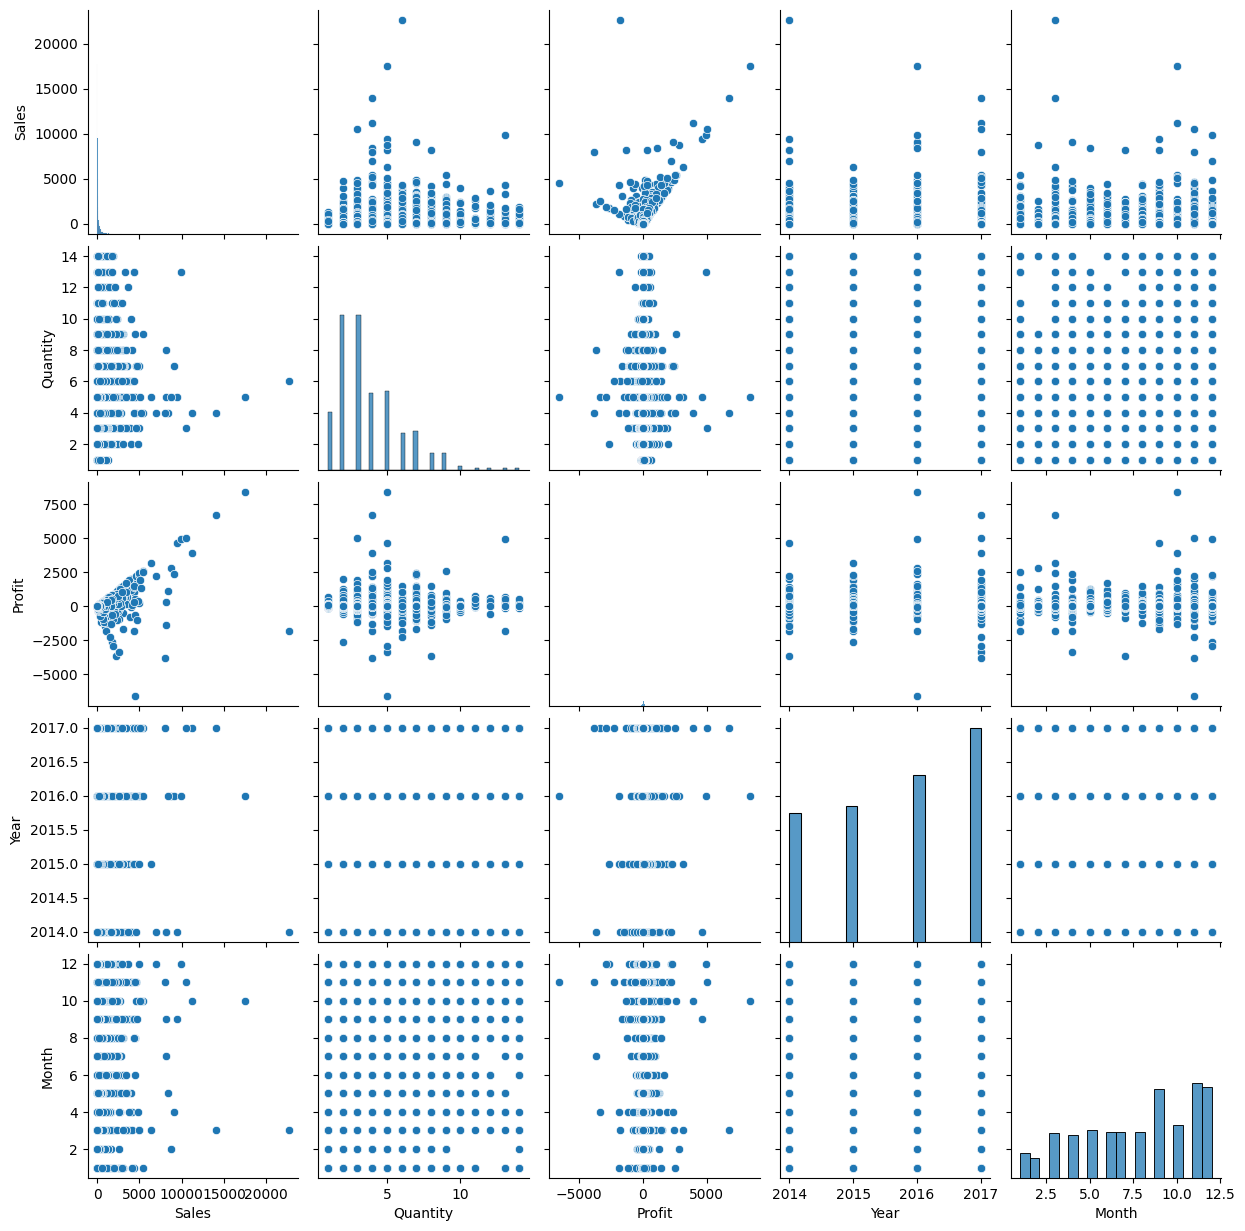

In [121]:
plt.figure(figsize=(5,4))
sns.pairplot(a)
plt.show()

# Top 5 betseller

<Axes: ylabel='Sales'>

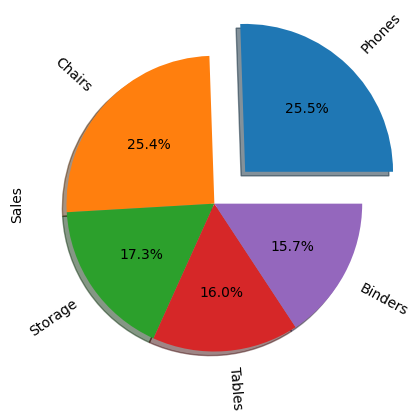

In [50]:
e=[0.3,0.0,0.0,0.0,0.0]
a.groupby("Sub-Category")["Sales"].sum().sort_values(ascending=False).\
head(5).plot(kind="pie",shadow=True,rotatelabels=True,autopct="%0.1f%%",explode=e)

# Sales by state

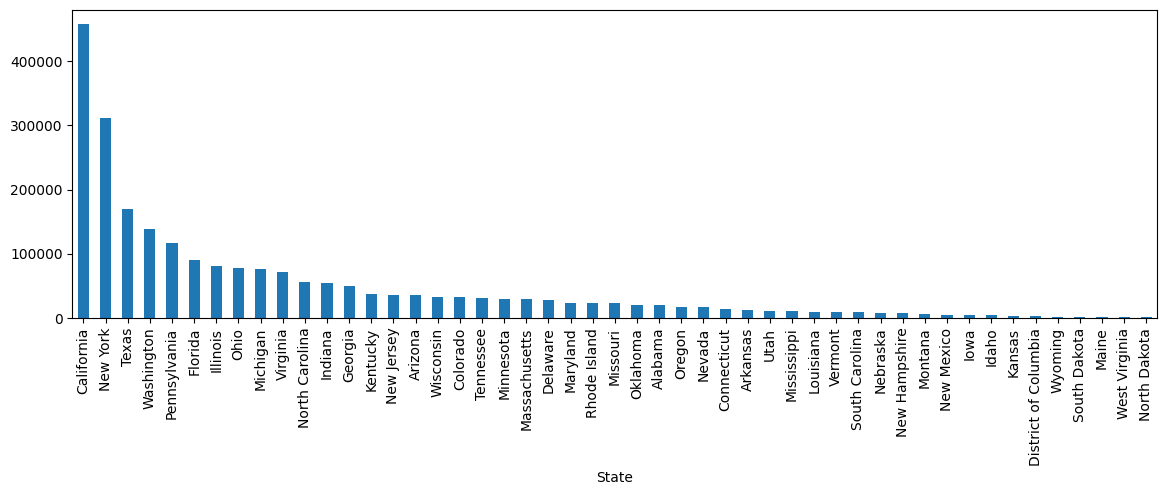

In [148]:
plt.figure(figsize=(14,4))
a.groupby("State")["Sales"].sum().sort_values(ascending=False).plot(kind="bar")
plt.show()

# No of unique customer per year

<Axes: xlabel='Year'>

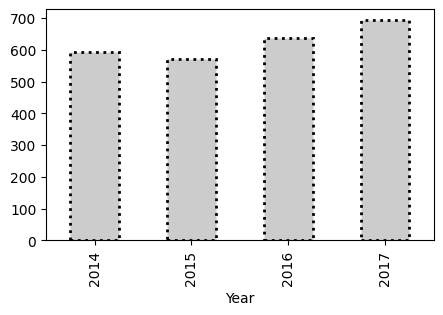

In [119]:
plt.figure(figsize=(5,3))
a.groupby("Year")["Customer Name"].nunique().plot(kind="bar",linestyle=":",edgecolor="black",\
 linewidth=2,cmap="Pastel2_r")